In [2]:
!pip install ace

  Obtaining dependency information for ace from https://files.pythonhosted.org/packages/3a/dc/cba6c428710a97ce908e0aa4aa3b5f6cbb7c55dcfc999fb302726a8e3f1c/ace-0.3.3-py3-none-any.whl.metadata


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
# Assuming the CSV is available at this path
file_path = 'appartements.csv'
df = pd.read_csv(file_path)


# Discretize the price into 4 categories: low, normal, high, and scam
# Define bins based on real estate price ranges (These are adjustable to real-world price ranges)
bins = [0, 150000, 250000, 400000, float('inf')]  # Example thresholds
labels = ['low', 'normal', 'high', 'scam']  # Classes
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

# Define features and target
X = df[['nbRooms', 'surface', 'nbWindows']]  # Features
y = df['price_category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=200)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.86      0.92         7
         low       0.67      1.00      0.80         2
      normal       1.00      1.00      1.00         7
        scam       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.92      0.96      0.93        20
weighted avg       0.97      0.95      0.95        20



c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Précision globale (Accuracy: 0.95) : Cela signifie que le modèle classifie correctement 95 % des appartements dans les bonnes catégories (bas, normal, élevé, arnaque) selon les caractéristiques fournies.

Précision (Precision) : C'est la proportion de prédictions correctes par rapport au nombre total de prédictions faites pour chaque classe.

Précision pour "high" (1.00) : Toutes les prédictions d'appartements dans la catégorie "élevé" sont correctes.
Précision pour "low" (0.67) : Seulement 67 % des appartements prévus comme étant "peu chers" étaient effectivement dans cette catégorie.
Précision pour "normal" (1.00) et "arnaque" (1.00) : Pour ces deux classes, toutes les prédictions sont correctes.
Rappel (Recall) : C'est la proportion d'exemples pertinents détectés correctement pour chaque classe.

Rappel pour "high" (0.86) : Le modèle a correctement détecté 86 % des appartements vraiment dans la catégorie "élevé".
Rappel pour "low" (1.00) : Tous les appartements de la catégorie "peu chers" ont été correctement identifiés.
Rappel pour "normal" (1.00) et "arnaque" (1.00) : Ces deux classes ont un rappel parfait.
F1-Score : C'est une mesure qui combine la précision et le rappel.

F1-Score pour "high" (0.92) : La balance entre précision et rappel est très bonne pour cette catégorie.
F1-Score pour "low" (0.80) : Le modèle a une performance correcte pour les "peu chers", mais il y a une marge d'amélioration.
F1-Score pour "normal" (1.00) et "arnaque" (1.00) : Les performances sont parfaites pour ces classes.
Support : C'est le nombre d'exemples dans chaque classe.

High (7) : Il y avait 7 exemples réels d'appartements "élevés".
Low (2) : Seulement 2 appartements étaient réellement "peu chers", ce qui peut expliquer pourquoi les résultats pour cette classe sont moins bons (dû au faible échantillon).
Normal (7) et Arnaque (4) : Le modèle a traité un nombre modéré d'exemples dans ces catégories.

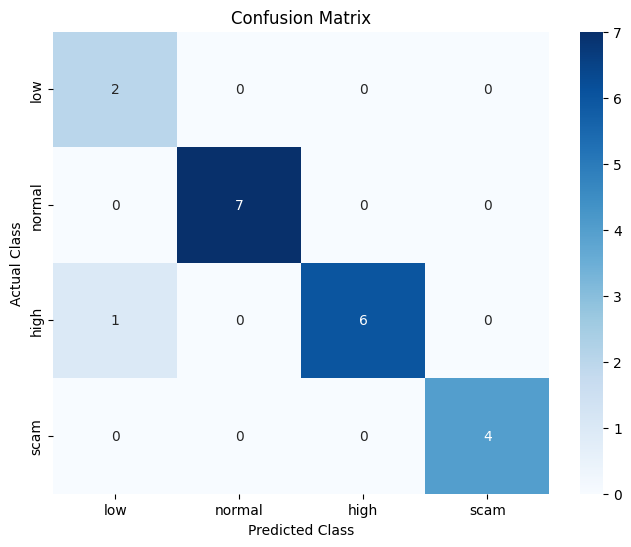

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'normal', 'high', 'scam'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
            'low', 'normal', 'high', 'scam'], yticklabels=['low', 'normal', 'high', 'scam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()